https://www.zoopla.co.uk/to-rent/property/london/clapham/?identifier=london%2Fclapham&furnished_state=unfurnished&include_shared_accommodation=false&page_size=100&q=Clapham%2C%20London&search_source=refine&radius=1&price_frequency=per_month

- furnished_state = unfurnished/furnished
- include_shared_accomodation = false/true
- price_frequency = per_month /per_week
- q - location, example: Clapham%2C%20London returns: Clapham, London
- restults_sort = newest_listings
- radius - 1 mile
- page_size = number of results per page - 10,25,50,100

In [1]:
#Importing packages
from bs4 import BeautifulSoup
import pandas as pd
import time
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
%matplotlib inline

In [2]:
#To ignore FutureWarnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Function below takes in a link from Zoopla and returns a dataframe of flats in the given area.

In [28]:
def zoopla_parser(first_page_link):
    #Creating lists to hold info extracted from each page
    rent=[]
    bedrooms=[]
    bathrooms = []
    receptions = []
    link=[]
    description=[]
    location=[]
    available=[]
    
    #Regex formula to find and separate the monthly cost in form of a number - 
    #eliminate pound sign, comma and the weekly cost in parenthesis
    
    reg = re.compile(r'£(\d*)?,?(\d*)\w*')
    
    #Accessing the first page and saving number pages for the search
    first_page = requests.get(first_page_link)
    c=first_page.content
    s = BeautifulSoup(c, 'html.parser')
    
    #Last page is listed as 2nd last position:
    num_of_pages = int(s.find('div', {'class':'paginate bg-muted'}).findAll('a')[-2].text) 
    
    for i in range(1,num_of_pages):
        page_link= first_page_link+'&pn='+str(i)
        page = requests.get(page_link)
        c = page.content
        s = BeautifulSoup(c, 'html.parser')
            
        #Get the content of each page:    
        listing = s.find('ul', {'class': 'listing-results clearfix js-gtm-list'}).findAll('div', {'class':'listing-results-right clearfix'})
        for flat in listing:
            #Using regex to select monthly rent and appending it to rent list
            try:
                res = reg.search(flat.find('a', {'class':'listing-results-price text-price'}).text.strip())
                rent.append(int(res.group(1)+res.group(2)))
            except:
                rent.append(None)
            #Finding number of bedrooms in specific span and appending to list
            try:
                bedrooms.append(int(flat.find('span', {'class':'num-icon num-beds'}).text.strip()))
            except:
                bedrooms.append(None)
            #Finding number of bathroom in span and appending to list
            try:
                bathrooms.append(int(flat.find('span', {'class':'num-icon num-baths'}).text.strip()))
            except:
                bathrooms.append(None)
            #Finding number of reception rooms and appending to list:
            try:
                receptions.append(int(flat.find('span', {'class':'num-icon num-reception'}).text.strip()))
            except:
                receptions.append(None)
            #Finding link and flat description:
            link.append('https://www.zoopla.co.uk'+flat.find('h2').find('a')['href'])
        
            description.append(flat.find('h2').find('a').text.strip())
        
            #Location:
            try:
                location.append(flat.findAll('span', {'class': None})[-1].text.strip())
            except:
                location.append(None)
            #Available:
            try:
                available.append(flat.find('p', {'class':'available-from'}).text.strip())
            except:
                available.append(None)
        
        if i%5==0:
            print('Page '+str(i)+' done') #Printing when every 5th page is done.    
            
        time.sleep(1)   
    
    #Return a dataframe containing all information 
    global df
    df = pd.DataFrame({'Rent':rent,
                  'Bedrooms': bedrooms,
                  'Bathrooms': bathrooms,
                  'Receptions': receptions,
                  'Description': description,
                  'Location': location,
                  'Available': available,
                  'Link': link})
    return(df)

In [29]:
zoopla_parser('https://www.zoopla.co.uk/to-rent/property/london/clapham/?identifier=london%2Fclapham&furnished_state=unfurnished&include_shared_accommodation=false&page_size=100&q=Clapham%2C%20London&search_source=refine&radius=3&price_frequency=per_month')

Page 5 done
Page 10 done
Page 15 done
Page 20 done
Page 25 done
Page 30 done
Page 35 done
Page 40 done
Page 45 done


,Rent,Bedrooms,Bathrooms,Receptions,Description,Location,Available,Link
0,108333.0,6.0,6.0,2.0,6 bed semi-detached house to rent,"The Boltons, Chelsea SW10",Available from 28th Mar 2019,https://www.zoopla.co.uk/to-rent/details/50432877
1,2817.0,2.0,1.0,1.0,2 bed flat to rent,"Cromwell Place, London SW7",Available immediately,https://www.zoopla.co.uk/to-rent/details/48184260
2,1850.0,2.0,1.0,NaN,2 bed flat to rent,"Alexandra Drive, Wimbledon SW19",Available from 15th Feb 2019,https://www.zoopla.co.uk/to-rent/details/50432788
3,2350.0,2.0,2.0,NaN,2 bed flat to rent,"St. Georges Square, London SW1V",Available from 7th Mar 2019,https://www.zoopla.co.uk/to-rent/details/50432732
4,1350.0,1.0,1.0,NaN,1 bed flat to rent,"Victoria Drive, Wimbledon SW19",Available immediately,https://www.zoopla.co.uk/to-rent/details/50432704
5,1018.0,NaN,1.0,NaN,Studio to rent,"Holdernesse Road, London SW17",Available immediately,https://www.zoopla.co.uk/to-rent/details/50432666
6,3033.0,1.0,1.0,1.0,1 bed flat to rent,"Christchurch Street, Chelsea, London SW3",None,https://www.zoopla.co.uk/to-rent/details/47889947
7,2492.0,2.0,1.0,1.0,2 bed flat to rent,"Lambrook Terrace, Fulham, London SW6",None,https://www.zoopla.co.uk/to-rent/details/50432430
8,1400.0,1.0,NaN,NaN,1 bed flat to rent,"Wincott Street, London SE11",Available from 2nd Apr 2019,https://www.zoopla.co.uk/to-rent/details/41491502
9,3200.0,4.0,2.0,2.0,4 bed semi-detached house to rent,"Haslemere Avenue, London SW18",Available from 24th Apr 2019,https://www.zoopla.co.uk/to-rent/details/50432271


In [32]:
#FUNCTION WORKS! 

#Regex formula to find and separate the monthly cost in form of a number - 
#eliminate pound sign, comma and the weekly cost in parenthesis
'''
reg = re.compile(r'£(\d*),?(\d*) (\w*)')

rent=[]
bedrooms=[]
bathrooms = []
receptions = []
link=[]
description=[]
location=[]
available=[]


    
for i in range(1,50):
    page_link='https://www.zoopla.co.uk/to-rent/property/east-sussex/brighton/?&include_shared_accommodation=false&page_size=100&price_frequency=per_month&q=Brighton%2C%20East%20Sussex&radius=3&results_sort=newest_listings&search_source=refine&pn={}'.format(i)
    page = requests.get(page_link)
    c= page.content
    soup = BeautifulSoup(c, 'html.parser')
    if i%5==0:
        print('Page '+str(i)+' done')
    
    try:
        listing = soup.find('ul', {'class': 'listing-results clearfix js-gtm-list'}).findAll('div', {'class':'listing-results-right clearfix'})
        for flat in listing:
            #Using regex to select monthly rent and appending it to rent list
            try:
                res = reg.search(flat.find('a', {'class':'listing-results-price text-price'}).text.strip())
                rent.append(int(res.group(1)+res.group(2)))
            except:
                rent.append(None)
            #Finding number of bedrooms in specific span and appending to list
            try:
                bedrooms.append(int(flat.find('span', {'class':'num-icon num-beds'}).text.strip()))
            except:
                bedrooms.append(None)
            #Finding number of bathroom in span and appending to list
            try:
                bathrooms.append(int(flat.find('span', {'class':'num-icon num-baths'}).text.strip()))
            except:
                bathrooms.append(None)
            #Finding number of reception rooms and appending to list:
            try:
                receptions.append(int(flat.find('span', {'class':'num-icon num-reception'}).text.strip()))
            except:
                receptions.append(None)
            #Finding link and flat description:
            link.append('https://www.zoopla.co.uk'+flat.find('h2').find('a')['href'])
        
            description.append(flat.find('h2').find('a').text.strip())
        
            #Location:
            try:
                location.append(flat.findAll('span', {'class': None})[-1].text.strip())
            except:
                location.append(None)
            #Available:
            try:
                available.append(flat.find('p', {'class':'available-from'}).text.strip())
            except:
                available.append(None)
        time.sleep(1)
    except:
        break
'''

"\nreg = re.compile(r'£(\\d*),?(\\d*) (\\w*)')\n\nrent=[]\nbedrooms=[]\nbathrooms = []\nreceptions = []\nlink=[]\ndescription=[]\nlocation=[]\navailable=[]\n\n\n    \nfor i in range(1,50):\n    page_link='https://www.zoopla.co.uk/to-rent/property/east-sussex/brighton/?&include_shared_accommodation=false&page_size=100&price_frequency=per_month&q=Brighton%2C%20East%20Sussex&radius=3&results_sort=newest_listings&search_source=refine&pn={}'.format(i)\n    page = requests.get(page_link)\n    c= page.content\n    soup = BeautifulSoup(c, 'html.parser')\n    if i%5==0:\n        print('Page '+str(i)+' done')\n    \n    try:\n        listing = soup.find('ul', {'class': 'listing-results clearfix js-gtm-list'}).findAll('div', {'class':'listing-results-right clearfix'})\n        for flat in listing:\n            #Using regex to select monthly rent and appending it to rent list\n            try:\n                res = reg.search(flat.find('a', {'class':'listing-results-price text-price'}).text.strip

In [33]:
'''df = pd.DataFrame({'Rent':rent,
                  'Bedrooms': bedrooms,
                  'Bathrooms': bathrooms,
                  'Receptions': receptions,
                  'Description': description,
                  'Location': location,
                  'Available': available,
                  'Link': link})
'''

"df = pd.DataFrame({'Rent':rent,\n                  'Bedrooms': bedrooms,\n                  'Bathrooms': bathrooms,\n                  'Receptions': receptions,\n                  'Description': description,\n                  'Location': location,\n                  'Available': available,\n                  'Link': link})\n"

In [34]:
df.to_csv('clapham.csv', index=False)

In [120]:
df = pd.read_csv('clapham.csv')

In [121]:
print(df.isnull().sum())

Rent              3
Bedrooms        196
Bathrooms       813
Receptions     1481
Description       0
Location          0
Available      1057
Link              0
dtype: int64


For listings that are missing rent there's not much we can do - they need to be removed. 
Listings with missing number of bedrooms, bathrooms and receptions we'll try to come up with a solution:

In [78]:
def clean_data(dataframe=df):
    global df
    #Removing any listings with missing Rent:
    df = df[df['Rent'].notnull()]
    

    #To make the analysis easier: anything that has a flat (or studio) in it will be assigned to 'flat', 
    #anything else will be assigned to 'house' or 'terraced house' if it has 'terrace' in the name. 
    # Entries that are room/flat shared need to be removed - we don't want shared properties.
    
    for index,row in df.iterrows():
        if 'room' in row['Description'].lower() or 'shared' in row['Description'].lower():
            df.drop(index, inplace=True)
        elif 'studio' in row['Description'].lower():
            df.loc[index, 'Bedrooms'] = 0
       
    for index,row in df.iterrows():
        if 'flat' in row['Description'].lower() or 'studio' in row['Description'].lower():
            df.set_value(index, 'Description', 'flat')
        elif 'terraced' in row['Description'].lower():
            df.set_value(index, 'Description', 'terraced')
        else:
            df.set_value(index, 'Description', 'house')
            
    #Removing any listings with more than 4 bedrooms - no one needs that many.
    df=df[df['Bedrooms']<5] 
    
    #Removing any listings with more than 4 bathrooms 
    df=df[df['Bathrooms']<5]
    
    #Most flats only have 1 reception so any missing value in Receptions will be filled with rounded mean
    df['Receptions'].fillna(round(df['Receptions'].mean()), inplace=True)
    
    
    #Remove listings with rent over £6000 - no one can afford that:
    df=df[df['Rent']<=6000]
    
    #Reset index after deleting many rows
    df.reset_index(drop=True, inplace=True)

In [124]:
clean_data(df)

/Users/jankierzyk/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3004 entries, 0 to 3003
Data columns (total 8 columns):
Rent           3004 non-null float64
Bedrooms       3004 non-null float64
Bathrooms      3004 non-null float64
Receptions     3004 non-null float64
Description    3004 non-null object
Location       3004 non-null object
Available      2450 non-null object
Link           3004 non-null object
dtypes: float64(4), object(4)
memory usage: 187.8+ KB


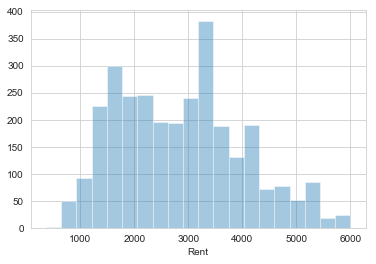

In [126]:
sns.set_style('whitegrid')
sns.distplot(df['Rent'], kde=False, bins=20);

In [130]:
df.Bedrooms.value_counts()

2.0    1581
1.0     762
3.0     365
4.0     159
0.0     137
Name: Bedrooms, dtype: int64

In [83]:
df.Bathrooms.value_counts()

1.0    1684
2.0    1231
3.0      82
4.0       7
Name: Bathrooms, dtype: int64

In [84]:
df.Receptions.value_counts()

1.0    2862
2.0     134
3.0       8
Name: Receptions, dtype: int64

In [85]:
df.Description.value_counts()

flat        2599
house        275
terraced     130
Name: Description, dtype: int64

In [86]:
df.groupby(['Bedrooms', 'Bathrooms'])['Rent'].mean()

Bedrooms  Bathrooms
0.0       1.0          1527.992647
          2.0          1300.000000
1.0       1.0          2288.315718
          2.0          3224.956522
          3.0          5200.000000
2.0       1.0          2517.405488
          2.0          3512.497274
          3.0          3275.625000
3.0       1.0          2078.792593
          2.0          3527.338624
          3.0          4374.384615
          4.0          4250.000000
4.0       1.0          2350.000000
          2.0          3389.930693
          3.0          3994.500000
          4.0          4940.000000
Name: Rent, dtype: float64

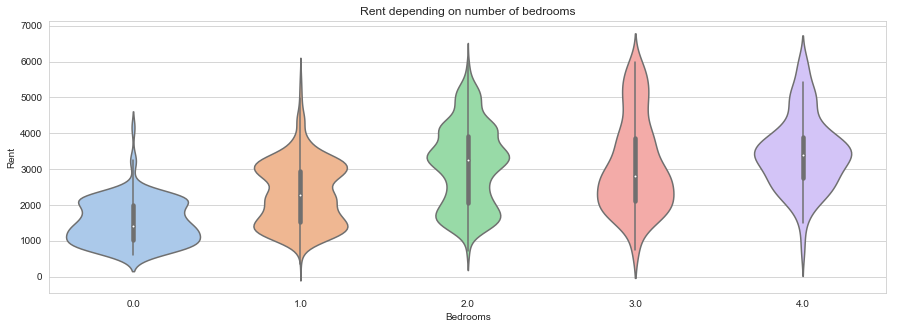

In [91]:
plt.figure(figsize=(15,5))
sns.violinplot(x='Bedrooms', y='Rent', data=df, palette='pastel')
plt.title('Rent depending on number of bedrooms');

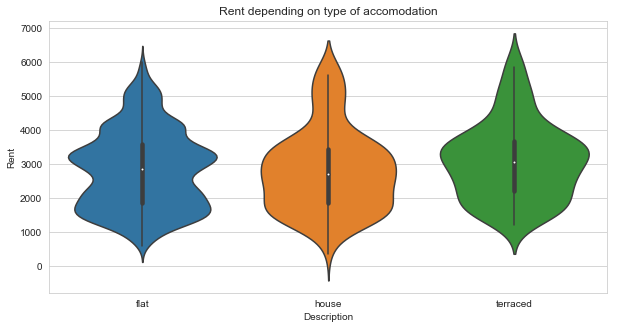

In [92]:
plt.figure(figsize=(10,5))
sns.violinplot(x='Description', y='Rent', data=df)
plt.title('Rent depending on type of accomodation');

## Let's now analyse flats that are available immediately and flats that you need to wait for:


In [93]:
#Creating new dataframes filtering on availability
available_now = df[df['Available']=='Available immediately']
available_later = df[df['Available']!='Available immediately']

In [94]:
print('available_now: ' +str(available_now.shape[0]))
print('available later: '+str(available_later.shape[0]))

available_now: 1847
available later: 1157


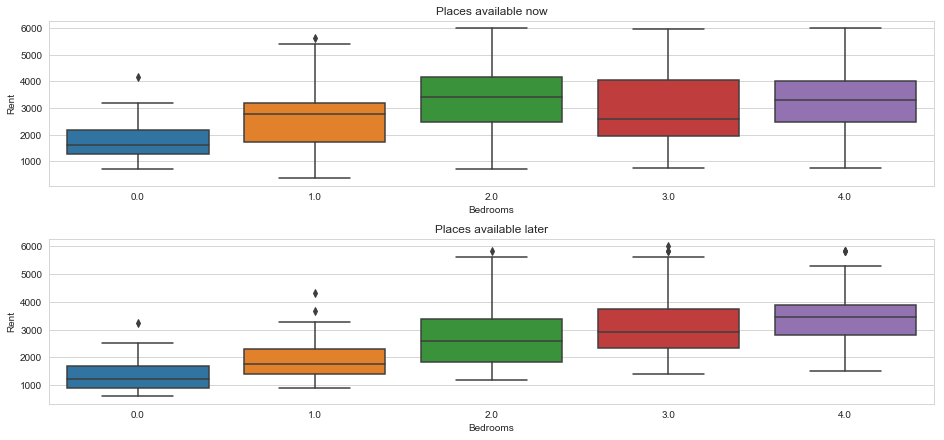

In [95]:
#Creating boxplots for flats available now and later
fig, ax =plt.subplots(2,1,figsize=(13,6),constrained_layout=True)
sns.boxplot(x='Bedrooms', y='Rent', data=available_now, ax=ax[0])
sns.boxplot(x='Bedrooms', y='Rent', data=available_later, ax=ax[1])
ax[0].set_title('Places available now')
ax[1].set_title('Places available later')
plt.show()

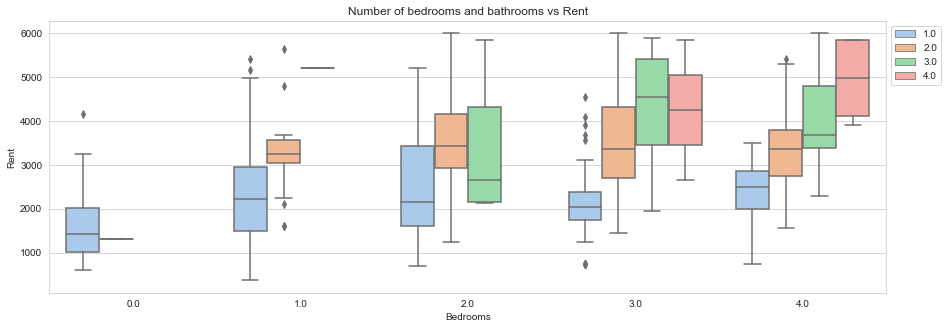

In [99]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Bedrooms', y='Rent', hue='Bathrooms', data=df, palette='pastel')
plt.title('Number of bedrooms and bathrooms vs Rent')
plt.legend(bbox_to_anchor=(1.0,1));

### How number of receptions influences the rent price

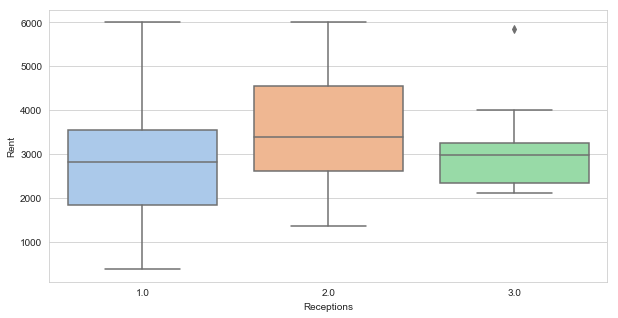

In [100]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Receptions', y='Rent',data=df, palette='pastel');

In [101]:
df.Location.describe()

count                        3004
unique                       1636
top       Hill Street, London W1J
freq                          149
Name: Location, dtype: object

In [102]:
df.corr()

,Rent,Bedrooms,Bathrooms,Receptions
Rent,1.000000,0.342511,0.533608,0.127790
Bedrooms,0.342511,1.000000,0.530213,0.297818
Bathrooms,0.533608,0.530213,1.000000,0.165290
Receptions,0.127790,0.297818,0.165290,1.000000


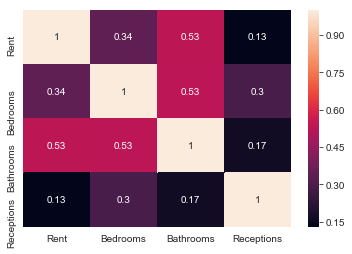

In [133]:
sns.heatmap(df.corr(), annot=True)

### Linear Regression

In [104]:
from sklearn.linear_model import LinearRegression

In [105]:
lr = LinearRegression()

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
df.columns

Index(['Rent', 'Bedrooms', 'Bathrooms', 'Receptions', 'Description',
       'Location', 'Available', 'Link'],
      dtype='object')

In [108]:
X = df[['Bedrooms', 'Bathrooms', 'Receptions']]
y=df['Rent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [109]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [110]:
predict = lr.predict(X_test)

In [111]:
from sklearn.metrics import classification_report

In [112]:
lr.coef_

array([  96.40704087, 1034.70572189,  222.23368123])

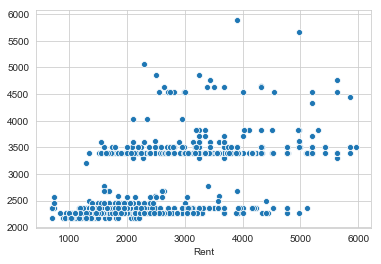

In [113]:
sns.scatterplot(y_test, predict)

In [114]:
#Mean Absolute Error
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, predict)

825.6192006975028

In [115]:
#Mean Squared Error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, predict)

1011885.9316917219

In [116]:
#Root Mean Squared Error
np.sqrt(mean_squared_error(y_test, predict))

1005.9254106004689

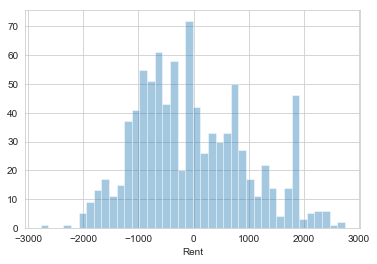

In [117]:
sns.distplot(y_test - predict, bins=40, kde=False)

In [118]:
pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])

,Coefficient
Bedrooms,96.407041
Bathrooms,1034.705722
Receptions,222.233681


## To do: 
- check other areas, compare them
